# Outlier detection on ecommerce purchase data using ISOLATION FOREST

In [1]:
# Importing the necesasry packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the ecommerce dataset
df1 = pd.read_csv("ecommerce_purchase_data.csv")
df1.head()

,CustomerID,Age,Gender,AnnualIncome,PurchaseAmount,PurchaseFrequency,LastPurchaseDate,ProductCategory,LoyaltyProgramMember,CustomerRating
0,1.0,56.0,Male,70225.0,125.635565,48.0,01-01-2023,Toys,0.0,1.210366
1,2.0,69.0,Male,57952.0,156.417933,NaN,02-01-2023,Books,0.0,3.201970
2,3.0,46.0,Other,57663.0,244.151650,39.0,03-01-2023,Toys,0.0,2.229175
3,4.0,32.0,Female,81381.0,36.275633,29.0,04-01-2023,Books,1.0,3.134410
4,5.0,60.0,Male,67929.0,307.515054,24.0,NaN,Clothing,1.0,1.537188


# Data Preprocessing and EDA

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            2947 non-null   float64
 1   Age                   2962 non-null   float64
 2   Gender                2964 non-null   object 
 3   AnnualIncome          2955 non-null   float64
 4   PurchaseAmount        2956 non-null   float64
 5   PurchaseFrequency     2945 non-null   float64
 6   LastPurchaseDate      2965 non-null   object 
 7   ProductCategory       2949 non-null   object 
 8   LoyaltyProgramMember  2954 non-null   float64
 9   CustomerRating        2957 non-null   float64
dtypes: float64(7), object(3)
memory usage: 234.5+ KB


In [4]:
df1.describe()

,CustomerID,Age,AnnualIncome,PurchaseAmount,PurchaseFrequency,LoyaltyProgramMember,CustomerRating
count,2947.000000,2962.000000,2955.000000,2956.000000,2945.000000,2954.000000,2957.000000
mean,1500.295894,43.517556,69938.474788,254.474133,25.302547,0.506093,3.025023
std,866.181462,14.937307,29174.762995,143.610427,14.127879,0.500048,1.146625
min,1.000000,18.000000,20060.000000,5.310621,1.000000,0.000000,1.001010
25%,748.500000,31.000000,44760.000000,134.347252,13.000000,0.000000,2.037566
50%,1500.000000,43.500000,69589.000000,255.926920,25.000000,1.000000,3.060551
75%,2249.500000,56.000000,95905.000000,377.407216,38.000000,1.000000,4.000336
max,3000.000000,69.000000,119993.000000,499.925376,49.000000,1.000000,4.999699


In [5]:
df1.describe(include='object')

,Gender,LastPurchaseDate,ProductCategory
count,2964,2965,2949
unique,3,2965,5
top,Male,01-01-2023,Toys
freq,1012,1,608


In [6]:
# Checking null values
df1.isna().sum()

CustomerID              53
Age                     38
Gender                  36
AnnualIncome            45
PurchaseAmount          44
PurchaseFrequency       55
LastPurchaseDate        35
ProductCategory         51
LoyaltyProgramMember    46
CustomerRating          43
dtype: int64

<Axes: >

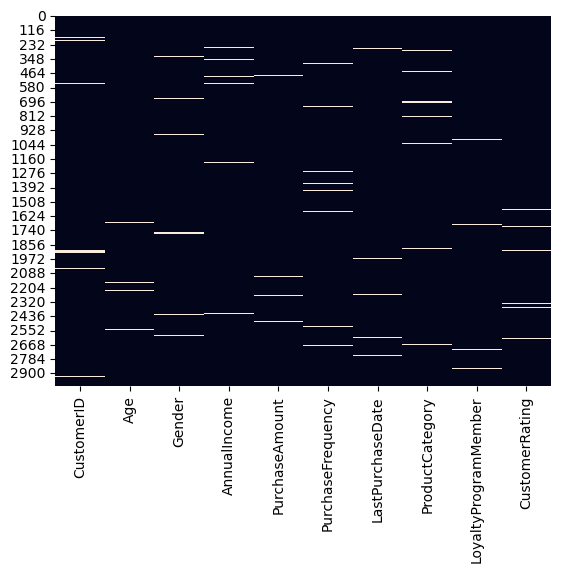

In [7]:
# Visualizing null values using sns heatmap

sns.heatmap(df1.isna(), cbar=False)

In [8]:
df2 = df1.copy() # copying the original dataset into a new variable

In [9]:
# Imputing the columns with null values

df2['Age'] = df2['Age'].fillna(df2['Age'].median())
df2['Gender'] = df2['Gender'].ffill()
df2['AnnualIncome'] = df2['AnnualIncome'].fillna(df2['AnnualIncome'].mean())
df2['PurchaseAmount'] = df2['PurchaseAmount'].fillna(df2['PurchaseAmount'].mean())
df2['PurchaseFrequency'] = df2['PurchaseFrequency'].fillna(df2['PurchaseFrequency'].median())
df2['ProductCategory'] = df2['ProductCategory'].fillna(df2['ProductCategory'].mode()[0])
df2['LoyaltyProgramMember'] = df2['LoyaltyProgramMember'].ffill()
df2['CustomerRating'] = df2['CustomerRating'].fillna(df2['CustomerRating'].mean())

In [10]:
# Droppinng the records with null values in LastPurchaseDate
df2.dropna(subset=['LastPurchaseDate'], inplace=True)

CustomerID is an identifier and not a feature for the model. So, dropping "CustomerID" instead of dealing null values in it

In [11]:
df2.drop(columns=['CustomerID'], axis=1, inplace=True)

<Axes: >

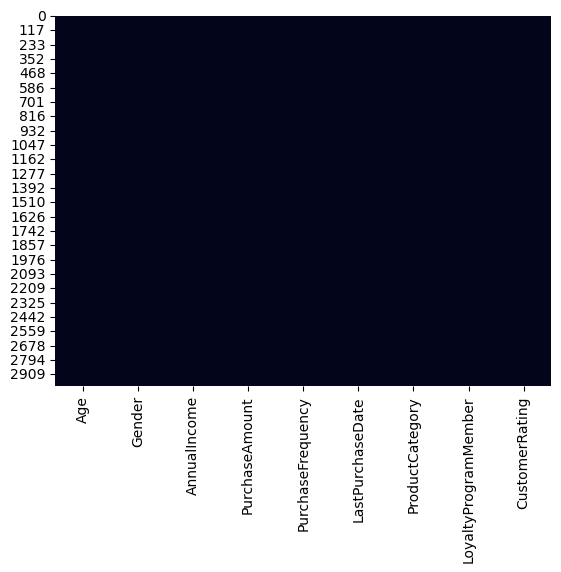

In [12]:
# Plotting sns heatmap after dealing with null values

sns.heatmap(df2.isna(), cbar=False)

# Visulazing the data

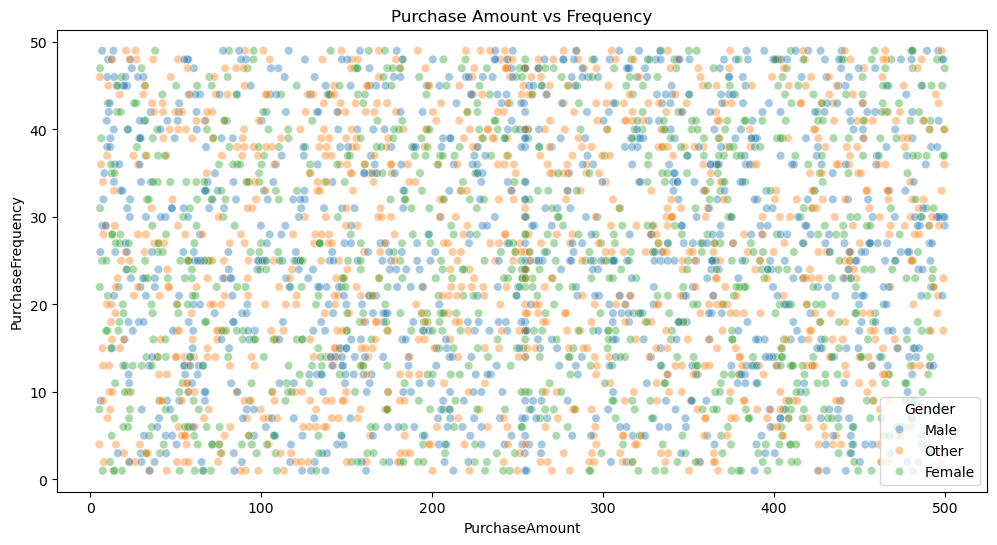

In [13]:
# Plotting purchase frequency vs purchase amount based on gender

plt.figure(figsize=(12,6))
sns.scatterplot(y='PurchaseFrequency', x= 'PurchaseAmount', hue='Gender', data=df2, alpha=0.4)
plt.title("Purchase Amount vs Frequency")
plt.show()

From the scatterplot, there is no linear relationship between purchase amount and frequency

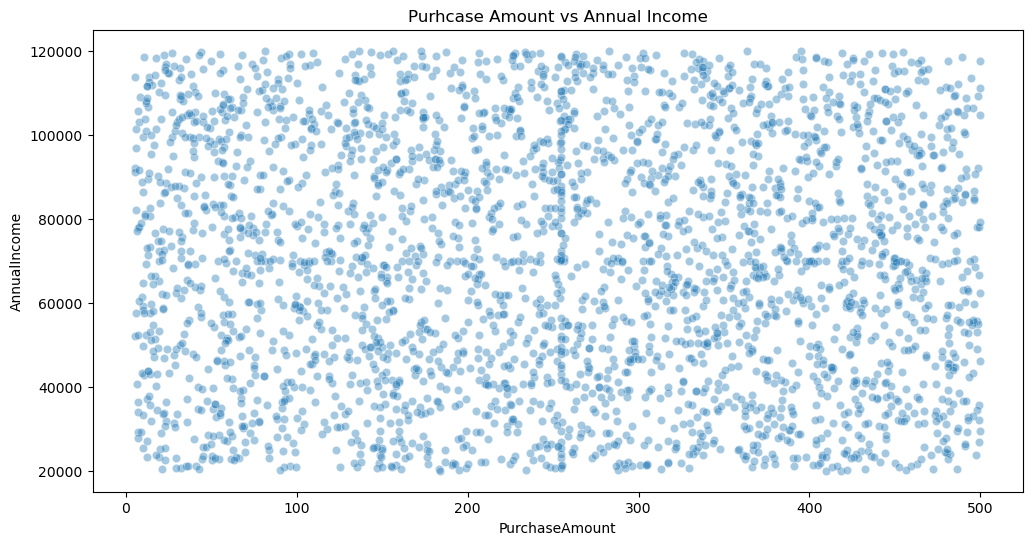

In [14]:
# Purchase amount vs AnnualIncome

plt.figure(figsize=(12,6))
sns.scatterplot(x='PurchaseAmount', y='AnnualIncome', data=df2, alpha=0.4)
plt.title("Purhcase Amount vs Annual Income")
plt.show()

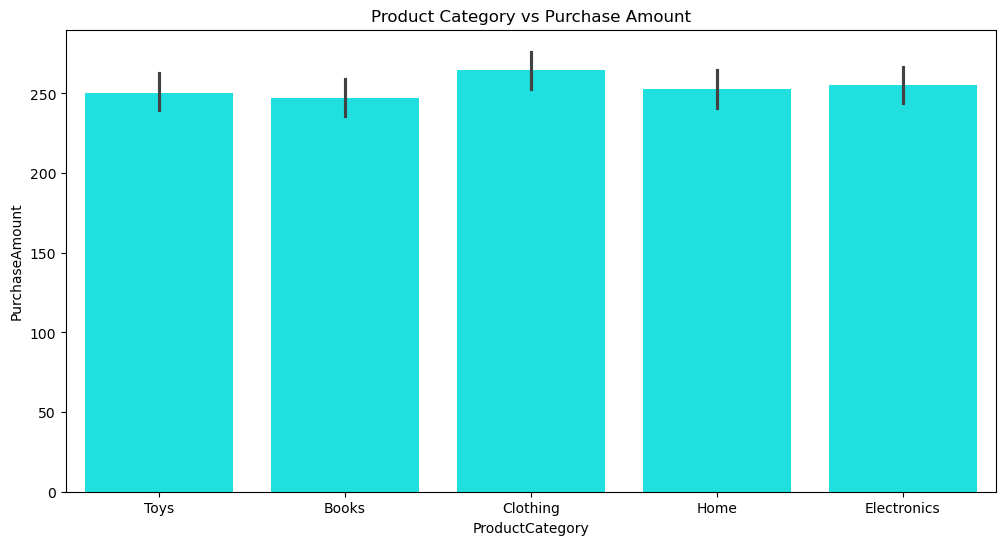

In [15]:
# Product catgory vs purchase amount

plt.figure(figsize=(12,6))
sns.barplot(x='ProductCategory', y= 'PurchaseAmount', data=df2, color='cyan')
plt.title("Product Category vs Purchase Amount")
plt.show()

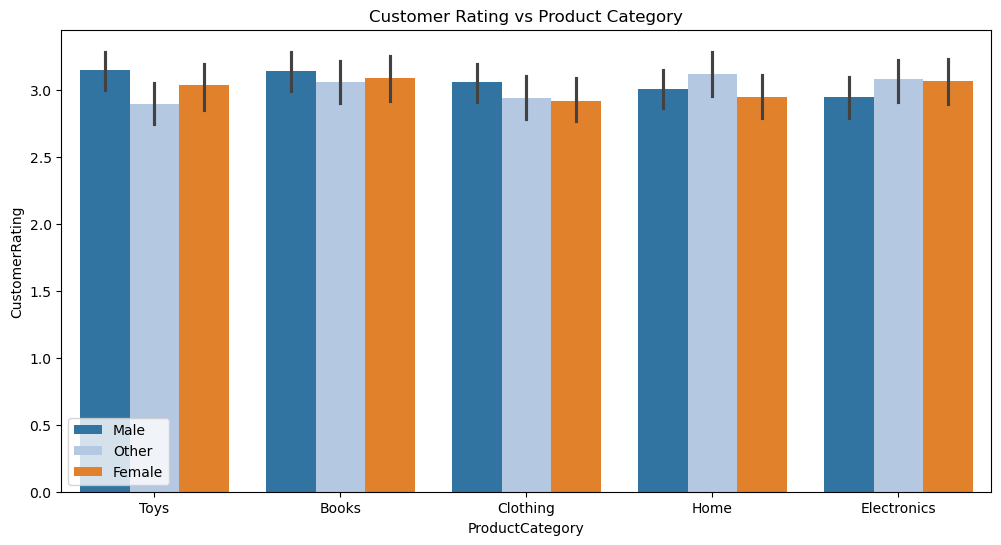

In [16]:
# Customer rating vs product category based on gender

plt.figure(figsize=(12,6))
sns.barplot(x='ProductCategory', y='CustomerRating', hue='Gender', data=df2, palette='tab20')
plt.title("Customer Rating vs Product Category")
plt.legend()
plt.show()

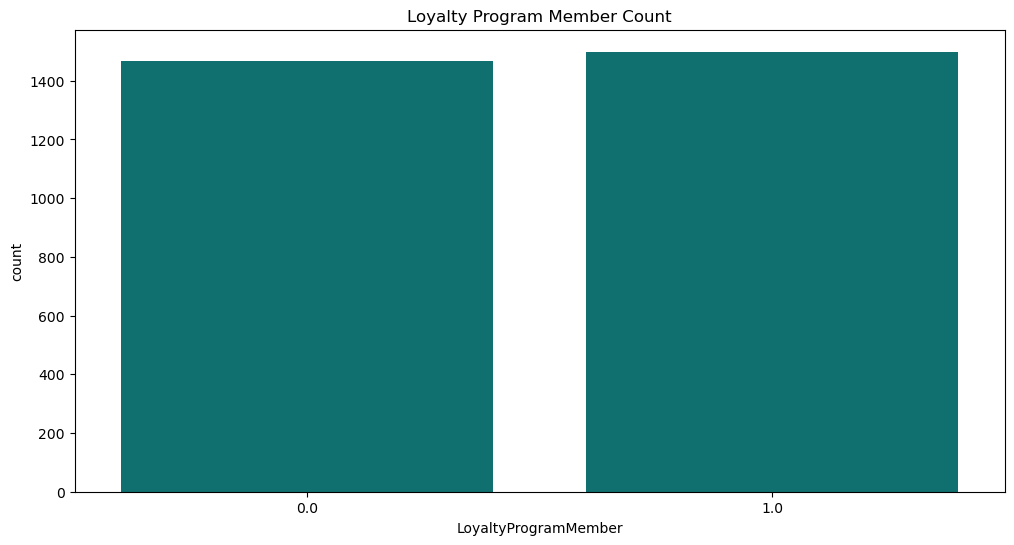

In [17]:
# Loyalty Program Member vs Customer Rating

plt.figure(figsize=(12,6))
sns.countplot(x='LoyaltyProgramMember', data=df2, color='teal')
plt.title("Loyalty Program Member Count")
plt.show()

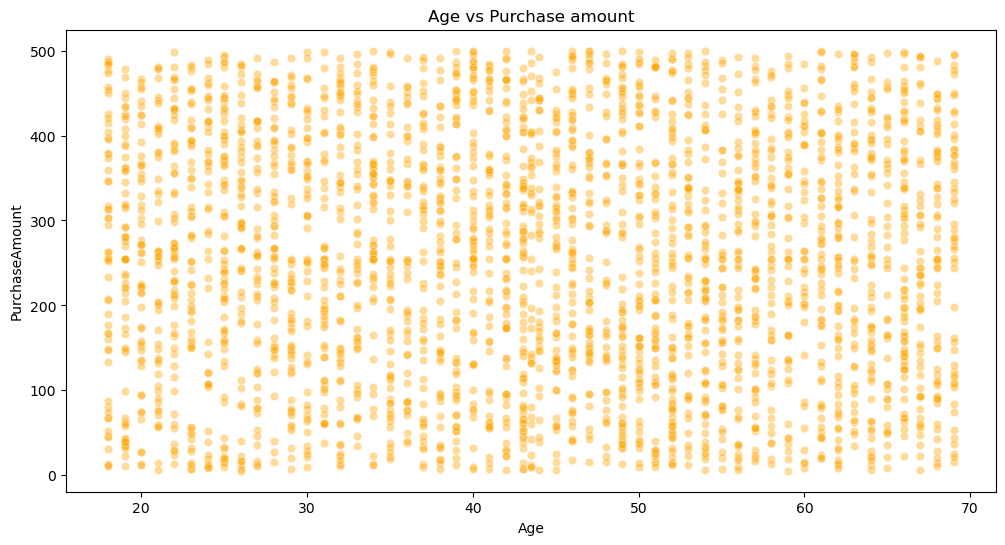

In [18]:
# Age vs Purchase amount

plt.figure(figsize=(12,6))
sns.scatterplot(x='Age', y='PurchaseAmount', data=df2, color='orange', alpha=0.4)
plt.title("Age vs Purchase amount")
plt.show()

<Axes: >

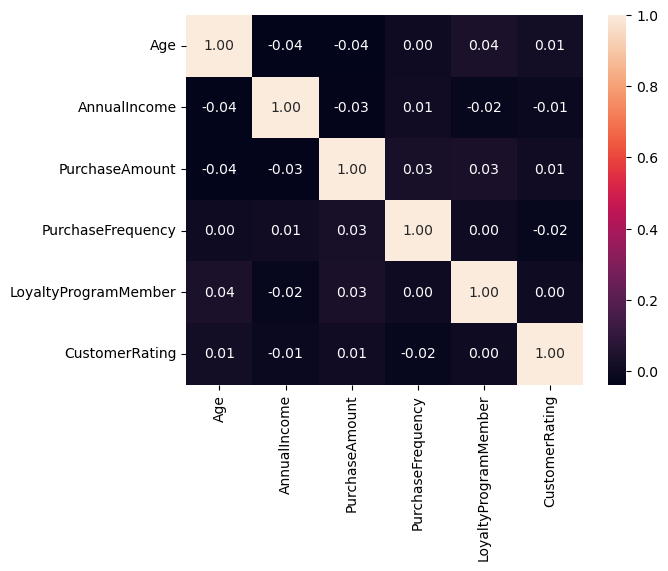

In [19]:
# Plotting correlation heatmap

sns.heatmap(df2.corr(numeric_only=True), cbar=True, annot=True, fmt='.2f')

<Axes: xlabel='AnnualIncome', ylabel='Count'>

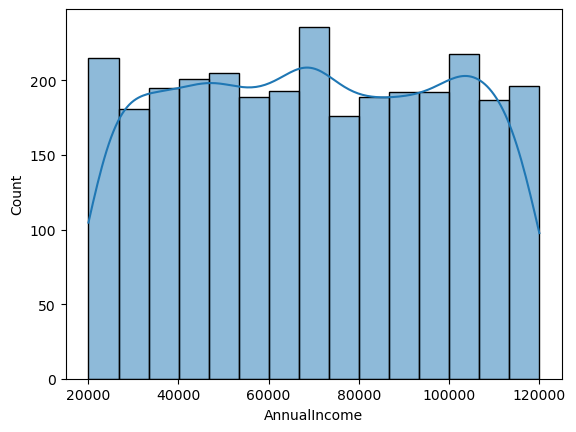

In [20]:
# Checking distributions for some continuous variable
sns.histplot(df2['AnnualIncome'], kde=True)

<Axes: xlabel='PurchaseAmount', ylabel='Count'>

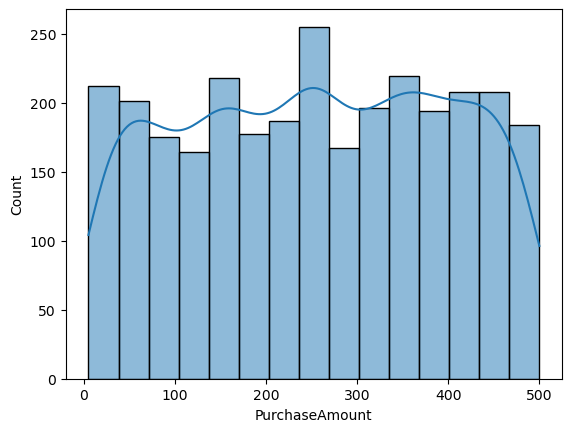

In [21]:
sns.histplot(df2['PurchaseAmount'], kde=True)

<Axes: xlabel='CustomerRating', ylabel='Count'>

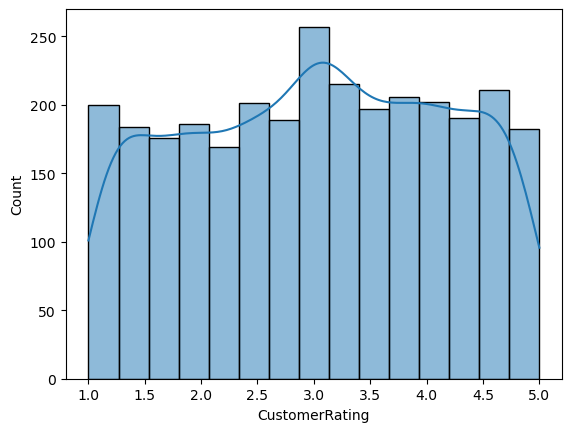

In [22]:
sns.histplot(df2['CustomerRating'], kde=True)

In [23]:
# Checking the year in the 'LastPurchaseDate' Column
df2['LastPurchaseDate']

0       01-01-2023
1       02-01-2023
2       03-01-2023
3       04-01-2023
5       06-01-2023
           ...    
2995    15-03-2031
2996    16-03-2031
2997    17-03-2031
2998    18-03-2031
2999    19-03-2031
Name: LastPurchaseDate, Length: 2965, dtype: object

We can see that the data contains the year between 2023 and 2031. We are going to extract month and year from that column, since the date from that columnn is less important

In [24]:
# Converting 'LastPurchaseDate' into datetime
df2['LastPurchaseDate'] = pd.to_datetime(df2['LastPurchaseDate'], dayfirst=True)

# Extracting month and year

df2['Purchase_Year'] = df2['LastPurchaseDate'].dt.year
df2['Purchase_Month'] = df2['LastPurchaseDate'].dt.month

In [25]:
# Dropping the 'LastDatePurchase' Column
df2.drop(columns=['LastPurchaseDate'], inplace=True)

# Feature Engineering

# Encoding Categorical Features

In [26]:
# Splitting numerical and categorical columns
num_cols = df2.select_dtypes(include=['int32', 'float64']).columns
cat_cols = df2.select_dtypes(exclude=['int32', 'float64']).columns

In [27]:
cat_cols

Index(['Gender', 'ProductCategory'], dtype='object')

In [28]:
# Applying one-hot encoding using Sklearn

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

cat_list = list(cat_cols)

In [29]:
# Defining ohe
ohe = OneHotEncoder(handle_unknown='ignore')

# Wrapping ohe into a columntransformer

preprocessor = ColumnTransformer(
    transformers=[('cat', ohe, cat_list)],
    remainder='passthrough'
)


In [30]:
# Fitting the data on preprocessor
df_transformed = preprocessor.fit_transform(df2)

In [31]:
# Get names of encoded columns
encoded_cols = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_list)

# Combine with numeric column names
all_cols = list(encoded_cols) + list(num_cols) 
print(all_cols)
# Convert to DataFrame
df_encoded = pd.DataFrame(df_transformed, columns=all_cols)


['Gender_Female', 'Gender_Male', 'Gender_Other', 'ProductCategory_Books', 'ProductCategory_Clothing', 'ProductCategory_Electronics', 'ProductCategory_Home', 'ProductCategory_Toys', 'Age', 'AnnualIncome', 'PurchaseAmount', 'PurchaseFrequency', 'LoyaltyProgramMember', 'CustomerRating', 'Purchase_Year', 'Purchase_Month']


In [32]:
df_encoded.head()

,Gender_Female,Gender_Male,Gender_Other,ProductCategory_Books,ProductCategory_Clothing,ProductCategory_Electronics,ProductCategory_Home,ProductCategory_Toys,Age,AnnualIncome,PurchaseAmount,PurchaseFrequency,LoyaltyProgramMember,CustomerRating,Purchase_Year,Purchase_Month
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,56.0,70225.0,125.635565,48.0,0.0,1.210366,2023.0,1.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,69.0,57952.0,156.417933,25.0,0.0,3.201970,2023.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,46.0,57663.0,244.151650,39.0,0.0,2.229175,2023.0,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,32.0,81381.0,36.275633,29.0,1.0,3.134410,2023.0,1.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,25.0,29343.0,491.948842,22.0,1.0,4.730520,2023.0,1.0


The above cell represents the encoded data before fitting into the isolation forest model

# Fitting the data into Isolation Forest

In [33]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(
    n_estimators=100,
    contamination=0.05,
    max_samples='auto',
    n_jobs=-1,
    random_state=42
)

In [34]:
df_encoded['Anomaly_Score'] = iso.fit_predict(df_encoded)

In [35]:
df_encoded['is_anomaly'] = df_encoded['Anomaly_Score'] == -1
print("Anomalies detected:", df_encoded['is_anomaly'].sum())

Anomalies detected: 149


# Deriving Insights from the Detected Anomalies

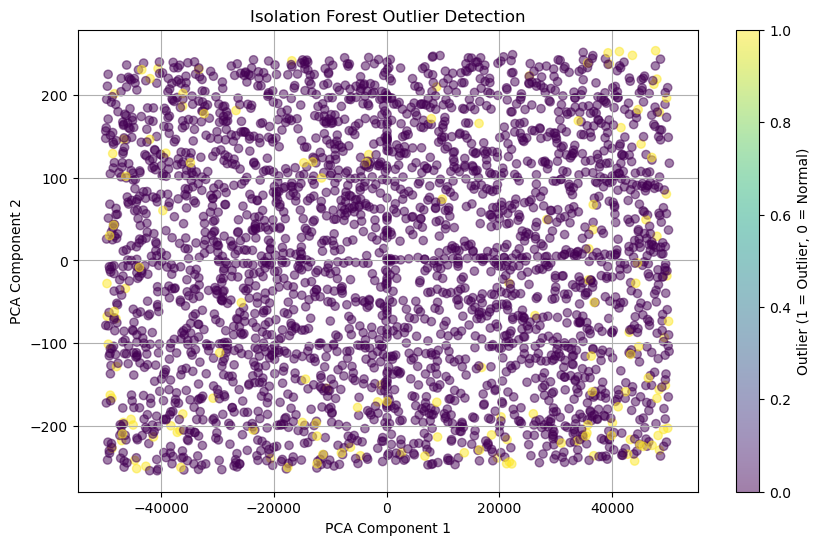

In [36]:
# Plotting anomalies using PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(df_encoded)

plt.figure(figsize=(10, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=df_encoded['is_anomaly'], cmap='viridis', alpha=0.5)
plt.title("Isolation Forest Outlier Detection")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Outlier (1 = Outlier, 0 = Normal)')
plt.grid(True)
plt.show()


In [37]:
# Percentage of outliers in the dataset
count_of_outliers = (df_encoded['is_anomaly'] == True).sum() 
total_records = df_encoded.shape[0]

percentage_outliers = (count_of_outliers / total_records) * 100
print(percentage_outliers)

print(f"The percentage of outliers detected is: {percentage_outliers: .2f}%")

5.025295109612141
The percentage of outliers detected is:  5.03%


In [38]:
outliers = df_encoded[df_encoded['is_anomaly'] == True]
normal = df_encoded[df_encoded['is_anomaly'] == False]

print("Outliers Summary:\n", outliers.describe())



Outliers Summary:
        Gender_Female  Gender_Male  Gender_Other  ProductCategory_Books  \
count     149.000000   149.000000    149.000000             149.000000   
mean        0.429530     0.275168      0.295302               0.201342   
std         0.496679     0.448105      0.457717               0.402356   
min         0.000000     0.000000      0.000000               0.000000   
25%         0.000000     0.000000      0.000000               0.000000   
50%         0.000000     0.000000      0.000000               0.000000   
75%         1.000000     1.000000      1.000000               0.000000   
max         1.000000     1.000000      1.000000               1.000000   

       ProductCategory_Clothing  ProductCategory_Electronics  \
count                149.000000                   149.000000   
mean                   0.134228                     0.181208   
std                    0.342047                     0.386490   
min                    0.000000                     0.0000

In [42]:
# Creating a new data frame with outliers
df_outlier = df_encoded[df_encoded['is_anomaly'] == True]  

In [43]:
df_outlier.reset_index(drop=True, inplace=True)

In [46]:
df_outlier.to_csv(r"C:\Users\pandi\Gradious assignments\Machine Learning\Assignment 5\outliers.csv")

In [48]:
# Checking for data entry issues
df_outlier.describe()

,Gender_Female,Gender_Male,Gender_Other,ProductCategory_Books,ProductCategory_Clothing,ProductCategory_Electronics,ProductCategory_Home,ProductCategory_Toys,Age,AnnualIncome,PurchaseAmount,PurchaseFrequency,LoyaltyProgramMember,CustomerRating,Purchase_Year,Purchase_Month,Anomaly_Score
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.0
mean,0.429530,0.275168,0.295302,0.201342,0.134228,0.181208,0.228188,0.255034,43.486577,74290.291777,192.792133,20.926174,0.510067,3.163574,2026.563758,6.187919,-1.0
std,0.496679,0.448105,0.457717,0.402356,0.342047,0.386490,0.421080,0.437350,19.261882,36603.013319,169.530886,17.714742,0.501585,1.424712,3.199075,4.279696,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,20287.000000,5.310621,1.000000,0.000000,1.001321,2023.000000,1.000000,-1.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,33731.000000,42.616786,5.000000,0.000000,1.655255,2023.000000,2.000000,-1.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,78899.000000,122.592207,15.000000,1.000000,3.411379,2026.000000,6.000000,-1.0
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,65.000000,110925.000000,371.105945,41.000000,1.000000,4.518253,2030.000000,11.000000,-1.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,69.000000,119864.000000,499.736608,49.000000,1.000000,4.992699,2031.000000,12.000000,-1.0


From the above cell, we can see that all the values of the columns are within the possible range

In [51]:
# Customers with high income and low purchase

high_in_low_spend = df_outlier[(df_outlier['AnnualIncome'] > df_outlier['AnnualIncome'].quantile(0.75)) &
                               (df_outlier['PurchaseAmount'] <= df_outlier['PurchaseAmount'].median()) & 
                               (df_outlier['PurchaseFrequency'] < df_outlier['PurchaseFrequency'].median())]
high_in_low_spend

,Gender_Female,Gender_Male,Gender_Other,ProductCategory_Books,ProductCategory_Clothing,ProductCategory_Electronics,ProductCategory_Home,ProductCategory_Toys,Age,AnnualIncome,PurchaseAmount,PurchaseFrequency,LoyaltyProgramMember,CustomerRating,Purchase_Year,Purchase_Month,Anomaly_Score,is_anomaly
19,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,26.0,113846.0,5.310621,4.0,1.0,2.568511,2023.0,7.0,-1,True
20,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,59.0,119708.0,44.142630,5.0,1.0,3.944216,2023.0,7.0,-1,True
53,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,68.0,118187.0,90.967460,1.0,0.0,4.009244,2024.0,7.0,-1,True
65,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,18.0,112588.0,13.734354,1.0,0.0,3.302309,2025.0,5.0,-1,True
81,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,69.0,114774.0,24.861687,13.0,1.0,4.932066,2027.0,7.0,-1,True
97,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,67.0,115377.0,22.922594,2.0,0.0,4.330892,2029.0,5.0,-1,True
119,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,65.0,112227.0,89.331789,7.0,1.0,4.595244,2030.0,10.0,-1,True


The above cell shows the list of customers who has High Income but spends less money and also buys very often.

With this data we can send extra promotional offers to these customers to increase the engagement

In [53]:
# Loyatly program member who spends less

loyalty_less = df_outlier[(df_outlier['LoyaltyProgramMember'] == 1) &
                          (df_outlier['PurchaseAmount'] < df_outlier['PurchaseAmount'].median())]
loyalty_less

,Gender_Female,Gender_Male,Gender_Other,ProductCategory_Books,ProductCategory_Clothing,ProductCategory_Electronics,ProductCategory_Home,ProductCategory_Toys,Age,AnnualIncome,PurchaseAmount,PurchaseFrequency,LoyaltyProgramMember,CustomerRating,Purchase_Year,Purchase_Month,Anomaly_Score,is_anomaly
5,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,38.0,65226.000000,19.256584,45.0,1.0,1.073864,2023.0,1.0,-1,True
19,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,26.0,113846.000000,5.310621,4.0,1.0,2.568511,2023.0,7.0,-1,True
20,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,59.0,119708.000000,44.142630,5.0,1.0,3.944216,2023.0,7.0,-1,True
21,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,32.0,89518.000000,12.880532,15.0,1.0,4.629158,2023.0,7.0,-1,True
22,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,69.0,32748.000000,52.837089,25.0,1.0,4.743199,2023.0,8.0,-1,True
23,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,66.0,24926.000000,62.906608,4.0,1.0,4.093412,2023.0,8.0,-1,True
29,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,33.0,23178.000000,66.165411,1.0,1.0,2.998681,2023.0,10.0,-1,True
30,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,19.0,72550.000000,22.152101,6.0,1.0,1.877313,2023.0,10.0,-1,True
33,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,69.0,68899.000000,104.352857,7.0,1.0,4.092555,2023.0,11.0,-1,True
34,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,66.0,59321.000000,101.523385,7.0,1.0,4.524757,2023.0,11.0,-1,True


We can clearly see why these records are considered as outliers. Usually, when a customer enrolls for loyaltymember program they tend to spend more and purchase frequently. But here the customer who enrolled for loyalty member program is spending less. 

So, we have to check or restructure our loyalty member program to engage these customers

In [54]:
# Non Member spending more 

no_loyalty_more = df_outlier[
    (df_outlier['LoyaltyProgramMember'] == 0.0) & 
    (df_outlier['PurchaseAmount'] > df_outlier['PurchaseAmount'].quantile(0.75))
]

There isn't a non member who is spending more. In case, if we find a customer who is spending more and is a non loyalty member then we can sell them to join the loyaltly member program by potentially listing out the benefits

In [55]:
category_cols = [
    'ProductCategory_Books', 'ProductCategory_Clothing',
    'ProductCategory_Electronics', 'ProductCategory_Home', 'ProductCategory_Toys'
]

df_outlier[category_cols].sum().sort_values(ascending=False)


ProductCategory_Toys           38.0
ProductCategory_Home           34.0
ProductCategory_Books          30.0
ProductCategory_Electronics    27.0
ProductCategory_Clothing       20.0
dtype: float64

C:\Users\pandi\AppData\Local\Temp\ipykernel_27232\1301874696.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_sales.index, y = monthly_sales.values, palette='viridis')


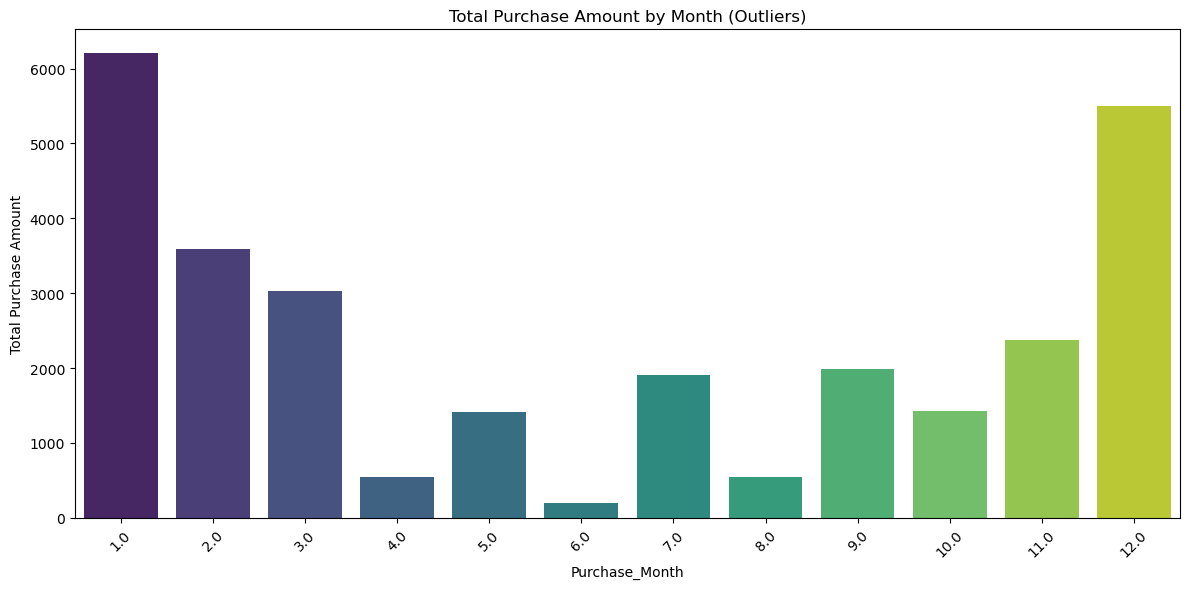

In [63]:
# Plotting Total purchase amount by month

monthly_sales = df_outlier.groupby('Purchase_Month')['PurchaseAmount'].sum()

plt.figure(figsize=(12,6))
sns.barplot(x=monthly_sales.index, y = monthly_sales.values, palette='viridis')
plt.title("Total Purchase Amount by Month (Outliers)")
plt.ylabel("Total Purchase Amount")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\pandi\AppData\Local\Temp\ipykernel_27232\3340449944.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(category_purchase.keys()), y=list(category_purchase.values()), palette='magma')


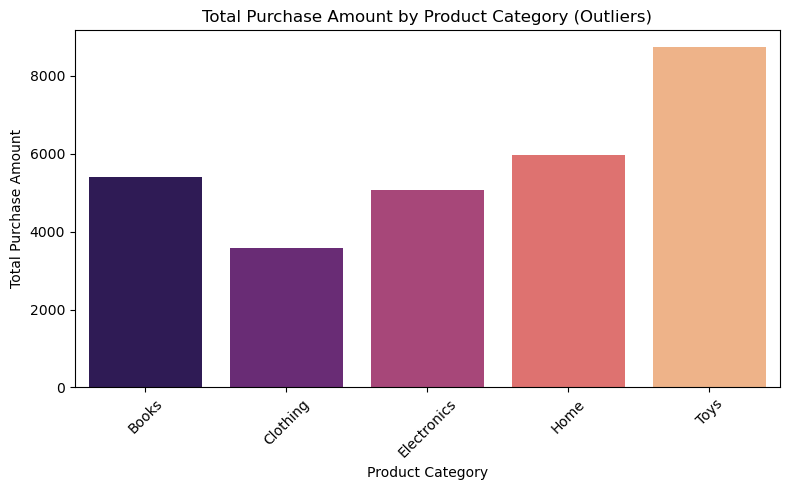

In [62]:
# Plotting Total purchase amount by products category

category_purchase = {
    col.replace('ProductCategory_', ''): (df_outlier[col] * df_outlier['PurchaseAmount']).sum()
    for col in category_cols
}

plt.figure(figsize=(8, 5))
sns.barplot(x=list(category_purchase.keys()), y=list(category_purchase.values()), palette='magma')
plt.title("Total Purchase Amount by Product Category (Outliers)")
plt.ylabel("Total Purchase Amount")
plt.xlabel("Product Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Summary of Analysis & Insights

### Objective
Detect and analyze customer outliers using Isolation Forest to uncover actionable patterns in e-commerce behavior.

### Key Findings
- 149 outliers identified from 3000 customers (~5%)
- Common traits: high income but low spend, one-time buyers, non-loyal high spenders
- Purchase outliers peak during specific months (e.g., January)
- Product categories like Toys & Home dominate anomaly purchases

### Business Insights
- Loyalty program misses high-value non-members
- Retarget one-time or disengaged customers
- Review data validation for odd entries (e.g., Age < 5)

### Recommended Actions
- Launch retention & loyalty campaigns for strategic user segments
- Investigate high-risk product categories
- Clean data input pipeline to avoid modeling bias

---
